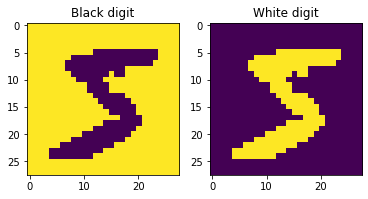

In [1]:
import numpy as np

import tensorflow.keras
from tensorflow.keras import models, layers, datasets, backend, utils, optimizers

import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train[x_train > 0] = 255
x_test[x_test > 0] = 255

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

def invert(images):
    images[images == 0] = 1
    images[images == 255] = 0
    return images.astype(np.float32)
    

def cnn_model(optimizer, input_shape=(28, 28, 1)):
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

# white digit
x_white_train = x_train / 255.
x_white_test = x_test / 255.

# black digit
x_black_train = invert(x_train)
x_black_test = invert(x_test)

plt.subplot(121)
plt.imshow(x_black_train[0, :, :, 0])
plt.title("Black digit")
plt.subplot(122)
plt.imshow(x_white_train[0, :, :, 0])
plt.title("White digit");

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for optimizer in [optimizers.Adadelta, optimizers.SGD, optimizers.Adam]:
    
    model_white = cnn_model(optimizer=optimizer())
    model_black = cnn_model(optimizer=optimizer())
    
    print(f"optimizer {optimizer.__name__}")
    print("training on white digits")
    white = model_white.fit(x_white_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(x_white_test, y_test))
    print("training on black digits")
    black = model_black.fit(x_black_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(x_black_test, y_test))
    
    plt.figure(figsize=(7, 4))
    plt.subplot(121)
    plt.plot(white.history["accuracy"], label="train")
    plt.plot(white.history["val_accuracy"], label="test")
    plt.grid(True)
    plt.title("white-digit", fontsize=15)
    plt.ylabel("Accuracy", fontsize=13)
    plt.xlabel("Epoch", fontsize=13)

    plt.subplot(122)
    plt.plot(black.history["accuracy"], label="train")
    plt.plot(black.history["val_accuracy"], label="test")
    plt.grid(True)
    plt.title("black-digit", fontsize=15)
    plt.xlabel("Epoch", fontsize=13)

    plt.suptitle(f"Optimizer={optimizer.__name__}", fontsize=18)

optimizer Adadelta
training on white digits
training on black digits
optimizer SGD
training on white digits
training on black digits
optimizer Adam
training on white digits
training on black digits
